In [23]:
import pandas as pd

# Load dataset
train_df = pd.read_csv("train.csv")

train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [25]:
# Fill missing categorical values with mode
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Fill missing numerical values with median
for col in train_df.select_dtypes(include=['number']).columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())

# Dictionary for categorical mapping
categorical_mapping = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Urban': 2, 'Semiurban': 1, 'Rural': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
}

# Apply mapping individually to avoid downcasting issues
for col, mapping in categorical_mapping.items():
    train_df[col] = train_df[col].map(mapping).astype('int64')

print("Data cleaned successfully!")

Data cleaned successfully!


In [27]:
# Check basic info
print(train_df.info())  

# Check first few rows
print(train_df.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB
None
    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          

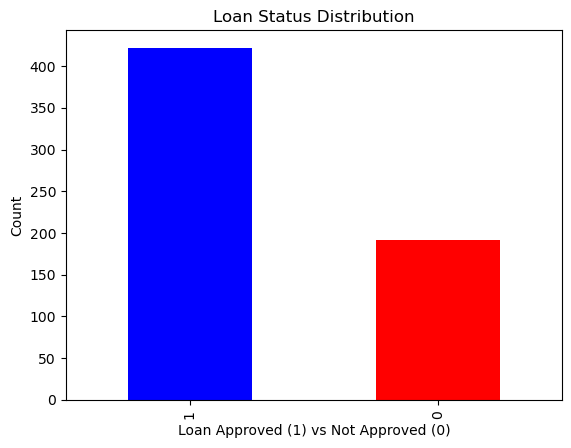

In [29]:
import matplotlib.pyplot as plt

train_df['Loan_Status'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Loan Status Distribution")
plt.xlabel("Loan Approved (1) vs Not Approved (0)")
plt.ylabel("Count")
plt.show()


In [103]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


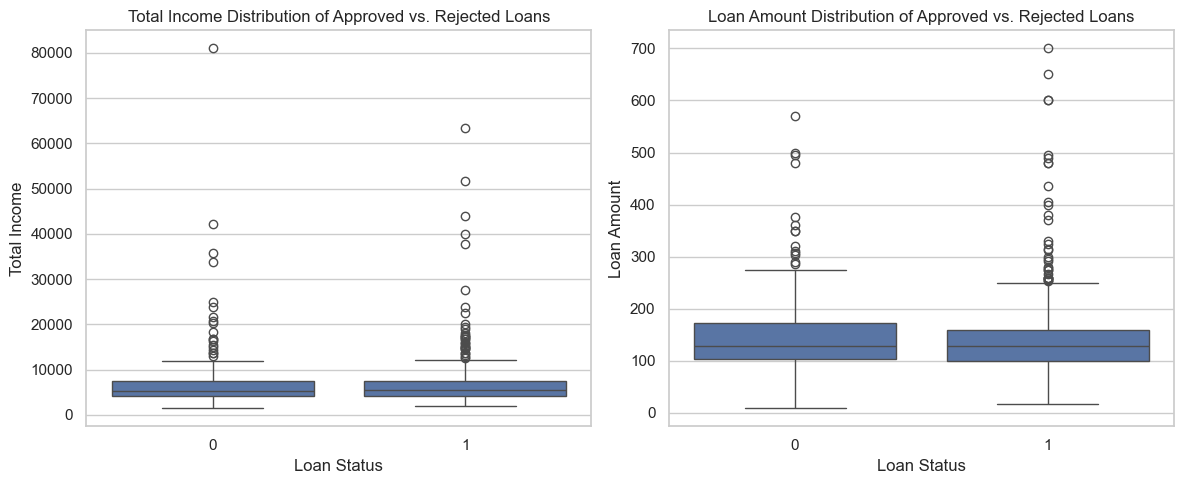

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']

# First Box Plot: Applicant Income Distribution
sns.boxplot(x='Loan_Status', y='TotalIncome', data=train_df, ax=axes[0])
axes[0].set_title('Total Income Distribution of Approved vs. Rejected Loans')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Total Income')

# Second Box Plot: Loan Amount Distribution
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df, ax=axes[1])
axes[1].set_title('Loan Amount Distribution of Approved vs. Rejected Loans')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Loan Amount')


plt.tight_layout()
plt.show()




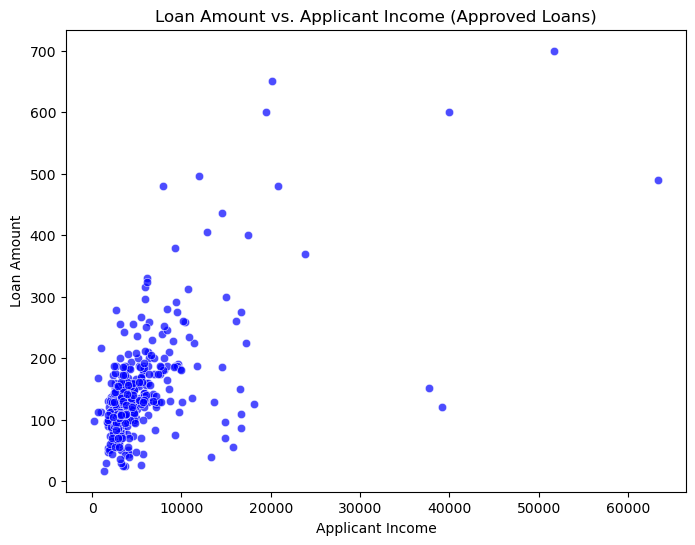

In [45]:
# Based on the previous visualizations, this chart focus on 
# illustrating the relationship between LoanAmount and ApplicantIncome for approved applicants

approved_loans = train_df[train_df['Loan_Status'] == 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=approved_loans, alpha=0.7, color='blue')

# Labels and title
plt.title('Loan Amount vs. Applicant Income (Approved Loans)')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')

# Show plot
plt.show()


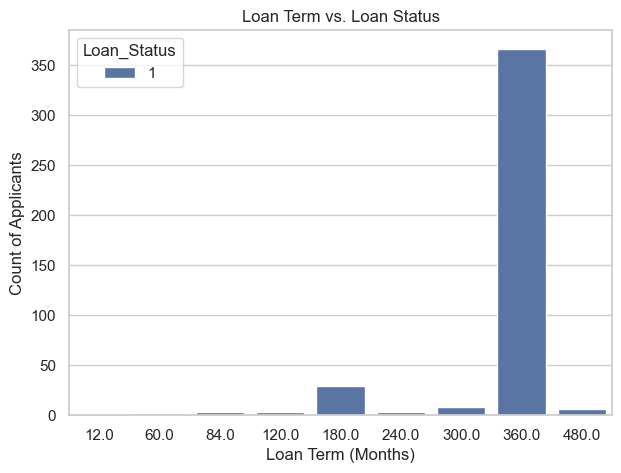

In [89]:
#Show the relationship between loan term and loan status (approval)
plt.figure(figsize=(7,5))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=approved_loans)
plt.title('Loan Term vs. Loan Status')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count of Applicants')
plt.show()


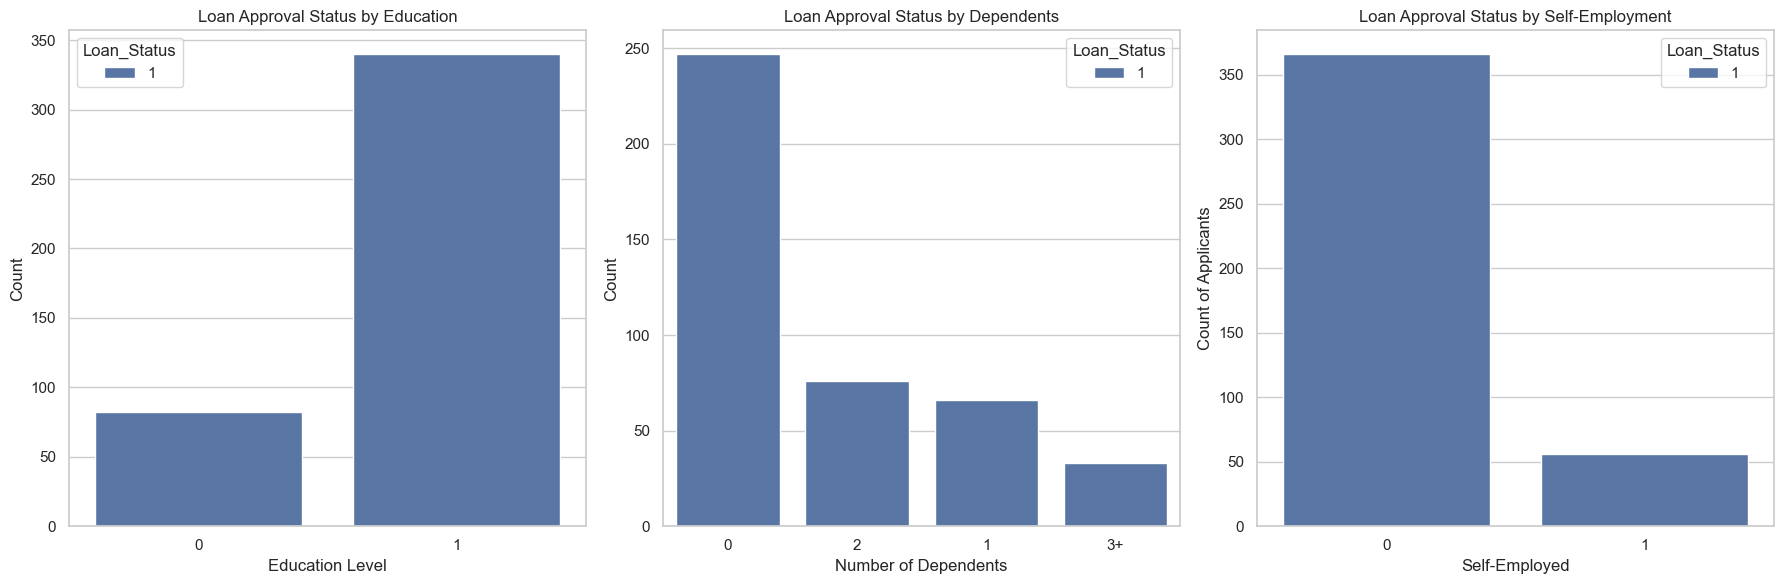

In [101]:
# Visualizes how the education level, dependents and employee status affects loan approval status.
# 'Graduate'= 1, 'Not Graduate'= 0}
# 'Self_Employed': {'Yes': 1, 'No': 0}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Loan Approval Status by Education
sns.countplot(x='Education', hue='Loan_Status', data=approved_loans, ax=axes[0])
axes[0].set_title('Loan Approval Status by Education')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Count')

# Plot 2: Loan Approval Status by Dependents
sns.countplot(x='Dependents', hue='Loan_Status', data=approved_loans, ax=axes[1])
axes[1].set_title('Loan Approval Status by Dependents')
axes[1].set_xlabel('Number of Dependents')
axes[1].set_ylabel('Count')

# Plot 3: Loan Approval Status by Self-Employment
sns.countplot(x='Self_Employed', hue='Loan_Status', data=approved_loans, ax=axes[2])
axes[2].set_title('Loan Approval Status by Self-Employment')
axes[2].set_xlabel('Self-Employed')
axes[2].set_ylabel('Count of Applicants')

plt.tight_layout()

plt.show()


In [52]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_df.drop(columns=['Loan_ID', 'Loan_Status'])  # Drop ID & target column
y = train_df['Loan_Status']  # Target variable

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data prepared for ML!")



Data prepared for ML!


In [53]:
# Convert '3+' in Dependents column to numeric
train_df['Dependents'] = train_df['Dependents'].replace('3+', 3).astype(float)


In [55]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature columns (excluding categorical encoded ones)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
model = LogisticRegression(max_iter=500)  # Increase iterations
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.79


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

# Print accuracy again
print(f"Model Accuracy: {accuracy:.2f}")

# Print detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Confusion Matrix:
[[18 25]
 [ 1 79]]
